<a href="https://colab.research.google.com/github/PriyankaAdimulam12/Python_Intro/blob/main/DBscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [54]:
df =pd.read_csv("iris_.csv")
print(df.head())
df

   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           1           5.1          3.5           1.4          0.2  setosa
1           2           4.9          3.0           1.4          0.2  setosa
2           3           4.7          3.2           1.3          0.2  setosa
3           4           4.6          3.1           1.5          0.2  setosa
4           5           5.0          3.6           1.4          0.2  setosa


,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [56]:
df1=df.drop(['Species','Unnamed: 0'],axis=1)

In [57]:
#standardizing our data
array=df1.values
array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [58]:
#converting to zscores
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [59]:
dbscan =DBSCAN(eps=0.475, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.475)

In [60]:
#noisy samples are labeled as -1(outliers)
dbscan.labels_
#0 is setosa,1 is versi,2 is virgina

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        2,  2,  2, -1, -1, -1, -1, -1,  2,  1,  2, -1, -1, -1,  2, -1, -1,
       -1,  2, -1, -1,  1,  2, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1,  2, -1,  2,  2,  2,  1,  2,  2,  2, -1,  2, -1, -1])

In [61]:
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [62]:
cl
pd.set_option("display.max_rows",None)

In [63]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [64]:
df1=pd.concat([df1,cl],axis=1)
df1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [65]:
plt.style.use('classic')

Text(0.5, 1.0, 'Clusters using DBScan')

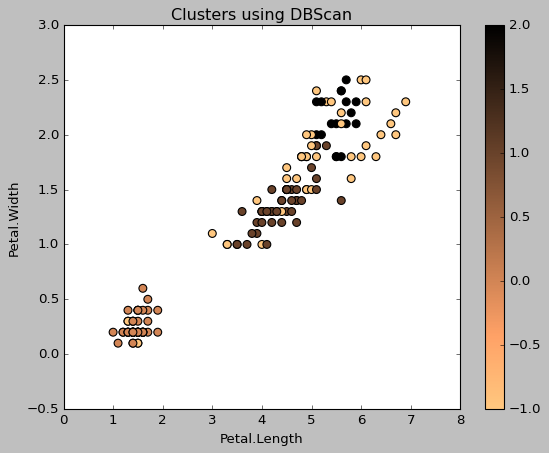

In [66]:
df1.plot(x="Petal.Length",y="Petal.Width",c=dbscan.labels_,kind="scatter",s=50,cmap=plt.cm.copper_r)
plt.title('Clusters using DBScan')

In [67]:
#here we have 3 clusters & the problem is here they are overlapping each other..
#these clusters are not homogenous..
#and also if u check the silhouette score is approximate to 0
#so whatever model u develeoped is not a great modell &we need to improve the model,
#by changing eps=0.48 or 0.49  and minpts=5,may be u see homogenous..
#but if u dont see any changes after improving ur model then we can change the clustering model to kmeans clustering..

In [68]:
dl=dbscan.labels_

In [69]:
import sklearn
sklearn.metrics.silhouette_score(X,dl)

np.float64(0.23537733019879264)

# test using Kmeansclustering

In [70]:
from sklearn.cluster import KMeans
clf=KMeans(n_clusters=3)
y_kmeans=clf.fit_predict(X)

In [71]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [72]:
#so we can apply silhouette score to hierarchial,kmeans clustering,DBscan to get better    result

In [73]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster'])
cl1

,Kcluster
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [74]:
df2=pd.concat([df1,cl1],axis=1)
df2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,cluster,Kcluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
5,5.4,3.9,1.7,0.4,0,1
6,4.6,3.4,1.4,0.3,0,1
7,5.0,3.4,1.5,0.2,0,1
8,4.4,2.9,1.4,0.2,0,1
9,4.9,3.1,1.5,0.1,0,1


Text(0.5, 1.0, 'Clusters using Kmeans')

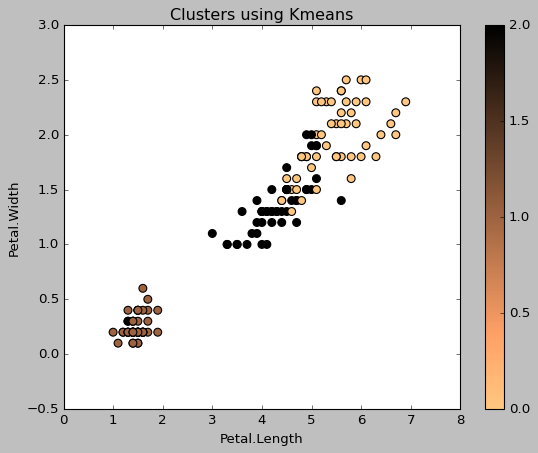

In [75]:
df2.plot(x="Petal.Length",y="Petal.Width",c=y_kmeans,kind="scatter",s=50,cmap=plt.cm.copper_r)
plt.title('Clusters using Kmeans')

In [76]:
#here its somewhat homogenous..
#check for silhpuette_score

In [77]:
sklearn.metrics.silhouette_score(X,y_kmeans)

np.float64(0.4565352255831264)

In [78]:
#see there is a improvement previously it was aroun 0.24

In [79]:
from sklearn.neighbors import NearestNeighbors

In [80]:
neigh=NearestNeighbors(n_neighbors=8)
nbrs=neigh.fit(X)
distances,indices=nbrs.kneighbors(X)

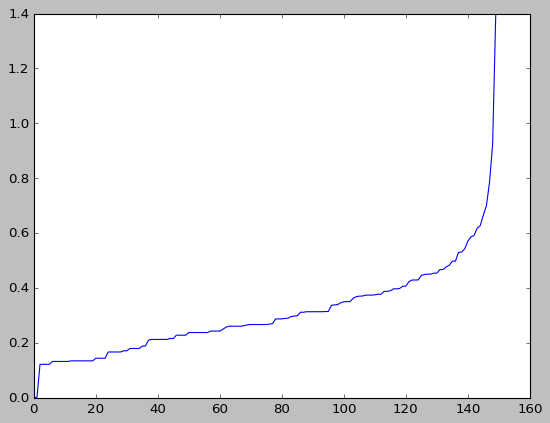

In [81]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)